In [258]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#df, weil "meineDaten" zu lang ist :D
df= pd.read_csv(r"C:\Users\Jure\Desktop\Studium\2 Semester\Alle-ladevorgänge-2022-03-16.csv", sep=";",encoding='latin-1',decimal=",")
df['Ladepunkt'] = df['Ladepunkt'].replace(['DE*cem*E740796*001'],'Salzgitter')
df['Ladepunkt'] = df['Ladepunkt'].replace(['DE*cem*E740796*002'],'Salzgitter')
df['Ladepunkt'] = df['Ladepunkt'].replace(['DE*cem*E740796*003'],'Salzgitter')
df['Ladepunkt'] = df['Ladepunkt'].replace(['DE*cem*E740796*004'],'Salzgitter')

df['Ladepunkt'] = df['Ladepunkt'].replace(['DE*cem*E809189*001'],'WF Recht')
df['Ladepunkt'] = df['Ladepunkt'].replace(['DE*cem*E809189*002'],'WF Recht')

df['Ladepunkt'] = df['Ladepunkt'].replace(['DE*cem*EMLP1'],'WF Gebäude H') #EMLP
df['Ladepunkt'] = df['Ladepunkt'].replace(['DE*cem*EMLP2'],'WF Gebäude H')

df['Ladepunkt'] = df['Ladepunkt'].replace(['DE*cem*ESLP1'],'WF Gebäude H') #ESLP2
df['Ladepunkt'] = df['Ladepunkt'].replace(['DE*cem*ESLP2'],'WF Gebäude H')


df.rename(columns={'Monat (MM/JJJJ)': 'Date'}, inplace=True) #Date weil auch hier zu lang :D

####Leere Spalten löschen
df.drop('Stop-Grund', inplace=True, axis=1)
df.drop('Grund für die Auffälligkeit', inplace=True, axis=1)
df.drop('Kosten', inplace=True, axis=1)
df.drop('Provider', inplace=True, axis=1)
df.drop('Operator', inplace=True, axis=1)

df["Date"] = pd.to_datetime(df["Date"]) #Wandelt Date in eine Zeit um

df.set_index("Date", inplace = True)

#tagesverbrauch = df["Verbrauch (kWh)"].resample("D").sum() #Gibt den Tagesverbrauch aus
#print(tagesverbrauch)

#wochenverbrauch = df["Verbrauch (kWh)"].resample("W").sum() #Gibt den Wochenverbrauch aus
#print(wochenverbrauch)

#%matplotlib inline

#tagesverbrauch.plot() #Grafik dazu
#wochenverbrauch.plot() #Grafik dazu

#df["Tagesverbrauch"]= df["Verbrauch (kWh)"].resample("D").sum() Funktioniert noch nicht
#df["Wochenverbrauch"]=df["Verbrauch (kWh)"].resample("W").sum() Funktioniert noch nicht

Verbrauch_der_Ladesäulen = pd.pivot_table(df, index="Ladepunkt", values="Verbrauch (kWh)", aggfunc = ["sum"])
print(Verbrauch_der_Ladesäulen)

                         sum
             Verbrauch (kWh)
Ladepunkt                   
Salzgitter         23764.490
WF Gebäude H        6121.000
WF Recht              30.212


In [259]:
from datetime import datetime



beginn = str("01/06/2020")
beginn_zeit = datetime.strptime(beginn,"%d/%m/%Y")
beginn_str = datetime.strftime(beginn_zeit,"%Y-%m-%d %H:%M:%S")


ende = str("30/06/2021")
ende_zeit = datetime.strptime(ende,"%d/%m/%Y")
ende_str = datetime.strftime(ende_zeit,"%Y-%m-%d %H:%M:%S") 



df = df[beginn_str :ende_str]
print(beginn_zeit)
print(beginn_str)
print(ende_str)
gruppieren= df.groupby(["Ladepunkt"])
#print(gruppieren)

2020-06-01 00:00:00
2020-06-01 00:00:00
2021-06-30 00:00:00


C:\Users\Jure\AppData\Local\Temp/ipykernel_9176/1331915498.py:16: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  df = df[beginn_str :ende_str]


In [260]:

wochenverbrauch = gruppieren["Verbrauch (kWh)"].resample("W").sum() 
                          
print(wochenverbrauch)

Ladepunkt     Date      
Salzgitter    2020-06-07    118.782
              2020-06-14     74.748
              2020-06-21    131.964
              2020-06-28    144.026
              2020-07-05    177.359
                             ...   
WF Gebäude H  2021-05-16   -342.380
              2021-05-23      0.000
              2021-05-30      0.000
              2021-06-06      0.000
              2021-06-13    136.650
Name: Verbrauch (kWh), Length: 88, dtype: float64


In [261]:
try:
    wfh =gruppieren.get_group("WF Gebäude H")
except:
    print("Keine Daten H")
    
try:
    salzgitter =gruppieren.get_group("Salzgitter")
except:
    print("Keine Daten Salzgitter")
try:
    wfr =gruppieren.get_group("WF Recht")
except:
    print("Keine Daten Recht")

Keine Daten Recht


In [262]:
try:
    wfh1 = wfh["Verbrauch (kWh)"].resample("W").sum()
except:
    print("Keine Daten H")
    
try:
    salzgitter1 = salzgitter["Verbrauch (kWh)"].resample("W").sum()
except:
    print("Keine Daten Salzgitter")
try:
    wfr1 = wfr["Verbrauch (kWh)"].resample("W").sum()
except:
    print("Keine Daten Recht")









Keine Daten Recht


Keine Daten


Text(0.5, 0, 'Datum')

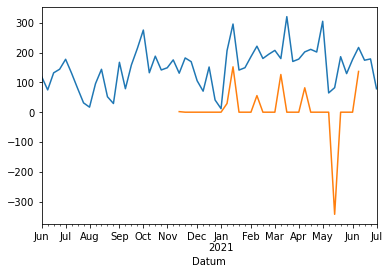

In [263]:
%matplotlib inline
try:
    salzgitter1.plot()
except:
    print("Keine Daten")
try:
     wfh1.plot()
except:
    print("Keine Daten")
try:
    wfr1.plot()
except:
    print("Keine Daten")

plt.xlabel("Datum")



